In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rev = pd.read_csv("rev.csv")

In [6]:
# rev.head().transpose()

In [7]:
# rev.head().T

In [9]:
rev.head() # Natural Language Processing

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
rev["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [15]:
rev["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

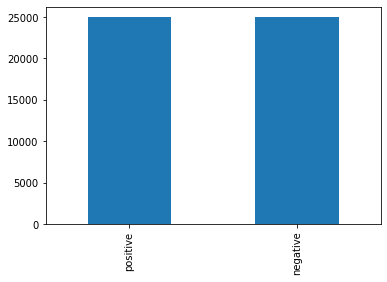

In [16]:
rev["sentiment"].value_counts().plot.bar()

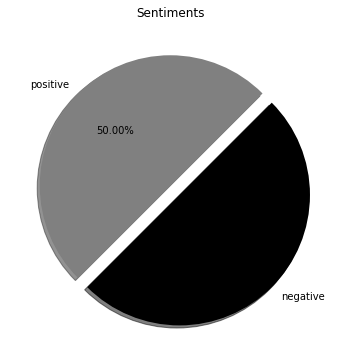

In [32]:
rev["sentiment"].value_counts().plot.pie(autopct = "%.2f%%", 
                                         startangle = 45,
                                         explode = (0,0.1), colors = ["gray", "K"],
                                        shadow = True, figsize= (12,6), ylabel = "", title = "Sentiments")
plt.show()

In [33]:
rep = {"positive":1,"negative":0 }

In [34]:
rev["sentiment"].replace(rep, inplace = True)

In [35]:
rev.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [36]:
# regex -> regular expression

# <p> I am a dS <p/>

In [37]:
# . -> \n -> line breaker
# \w  -> a-zA-z0-9_  \W
# \d  -> 0-9

In [43]:
rev["review"].str.replace(r"<.*>","")[0] # <> , <p>, <br>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."

In [44]:
rev["review"] = rev["review"].str.replace(r"<.*>","")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [45]:
import re

In [46]:
def clean(text):
    rep = re.compile(r"<.*>")
    return re.sub(rep,"",text)

In [47]:
# rev["review"].apply(text)

In [48]:
"Waqas?@".isalnum()

False

In [49]:
"Waqas257".isalnum()

True

In [50]:
"Waqas".isalnum()

True

In [56]:
# for i in rev["review"][0]:
#     st = ""
#     if i.isalnum():
#         st+=i
#     else:
#         st += ""
#     print(st)

In [64]:
def pure(text):
    st = ""
    for i in text:
        if i.isalnum(): 
            st+=i
        else:
            st += " "
    return st
    

In [66]:
rev["review"].apply(pure)[0]

'One of the other reviewers has mentioned that after watching just 1 Oz episode you ll be hooked  They are right  as this is exactly what happened with me I would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare  Forget pretty pictures painted for mainstream audiences  forget charm  forget romance   OZ doesn t mess around  The first episode I ever saw struck me as so nasty it was surreal  I couldn t say I was ready for it  but as I watched more  I developed a taste for Oz  and got accustomed to the high levels of graphic violence  Not just violence  but injustice  crooked guards who ll be sold out for a nickel  inmates who ll kill on order and get away with it  well mannered  middle class inmates being turned into prison bitches due to their lack of street skills or prison experience  Watching Oz  you may become comfortable with what is uncomfortable viewing    thats if you can get in touch with your darker side '

In [68]:
rev["review"].str.replace(r"\w","")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0                      '  .   ,        .               ...
1           .         :      ,      ''     .        ,  ...
2                       ,          - .    ,           (...
3         '       ()  '      &       .          &  .   ...
4         ' "     "       . .         .            ,   ...
                               ...                        
49995             .  '       ,       .      .          ...
49996     ,  ,  ,  ,            ,             .  ,     ...
49997              ,        & .             " "   '    ...
49998    '                .     ,                      ...
49999              ,                 . ,     ,        -...
Name: review, Length: 50000, dtype: object

In [73]:
rev["review"].str.replace(r"\W"," ")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0        One of the other reviewers has mentioned that ...
1        A wonderful little production  The realism rea...
2        I thought this was a wonderful way to spend ti...
3        Basically there s a family where a little boy ...
4        Petter Mattei s  Love in the Time of Money  is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot  bad dialogue  bad acting  idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I m going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [74]:
pure(rev["review"][0])

'One of the other reviewers has mentioned that after watching just 1 Oz episode you ll be hooked  They are right  as this is exactly what happened with me I would say the main appeal of the show is due to the fact that it goes where other shows wouldn t dare  Forget pretty pictures painted for mainstream audiences  forget charm  forget romance   OZ doesn t mess around  The first episode I ever saw struck me as so nasty it was surreal  I couldn t say I was ready for it  but as I watched more  I developed a taste for Oz  and got accustomed to the high levels of graphic violence  Not just violence  but injustice  crooked guards who ll be sold out for a nickel  inmates who ll kill on order and get away with it  well mannered  middle class inmates being turned into prison bitches due to their lack of street skills or prison experience  Watching Oz  you may become comfortable with what is uncomfortable viewing    thats if you can get in touch with your darker side '

In [75]:
rev["review"] = rev["review"].apply(pure)

In [76]:
rev.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production The realism rea...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there s a family where a little boy ...,0
4,Petter Mattei s Love in the Time of Money is...,1


In [77]:
rev["review"] = rev["review"].str.lower()

In [78]:
rev.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the realism rea...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there s a family where a little boy ...,0
4,petter mattei s love in the time of money is...,1


In [79]:
ord("O")

79

In [80]:
ord("o")

111

In [83]:
from nltk.corpus import stopwords

In [86]:
stop_words = stopwords.words("english")

In [87]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [90]:
print(rev["review"][0].split())

['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'oz', 'episode', 'you', 'll', 'be', 'hooked', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'i', 'would', 'say', 'the', 'main', 'appeal', 'of', 'the', 'show', 'is', 'due', 'to', 'the', 'fact', 'that', 'it', 'goes', 'where', 'other', 'shows', 'wouldn', 't', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'for', 'mainstream', 'audiences', 'forget', 'charm', 'forget', 'romance', 'oz', 'doesn', 't', 'mess', 'around', 'the', 'first', 'episode', 'i', 'ever', 'saw', 'struck', 'me', 'as', 'so', 'nasty', 'it', 'was', 'surreal', 'i', 'couldn', 't', 'say', 'i', 'was', 'ready', 'for', 'it', 'but', 'as', 'i', 'watched', 'more', 'i', 'developed', 'a', 'taste', 'for', 'oz', 'and', 'got', 'accustomed', 'to', 'the', 'high', 'levels', 'of', 'graphic', 'violence', 'not', 'just', 'violence', 'but', 'injustice', 'crooked', 'guards', 'who', 'll', 'be', 'sold'

In [91]:
from nltk.tokenize import word_tokenize

In [93]:
print(word_tokenize(rev["review"][0]))

['one', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'oz', 'episode', 'you', 'll', 'be', 'hooked', 'they', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'i', 'would', 'say', 'the', 'main', 'appeal', 'of', 'the', 'show', 'is', 'due', 'to', 'the', 'fact', 'that', 'it', 'goes', 'where', 'other', 'shows', 'wouldn', 't', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'for', 'mainstream', 'audiences', 'forget', 'charm', 'forget', 'romance', 'oz', 'doesn', 't', 'mess', 'around', 'the', 'first', 'episode', 'i', 'ever', 'saw', 'struck', 'me', 'as', 'so', 'nasty', 'it', 'was', 'surreal', 'i', 'couldn', 't', 'say', 'i', 'was', 'ready', 'for', 'it', 'but', 'as', 'i', 'watched', 'more', 'i', 'developed', 'a', 'taste', 'for', 'oz', 'and', 'got', 'accustomed', 'to', 'the', 'high', 'levels', 'of', 'graphic', 'violence', 'not', 'just', 'violence', 'but', 'injustice', 'crooked', 'guards', 'who', 'll', 'be', 'sold'

In [95]:
'yourselves' in  stop_words

True

In [97]:
def rem_sw(text):
    lst = []
    token = word_tokenize(text)
    sw = stopwords.words("english") # list
    for i in token:
        if i not in sw:
            lst.append(i)
    return lst

In [98]:
rev["review"] = rev["review"].apply(rem_sw)

In [99]:
rev

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",1
1,"[wonderful, little, production, realism, reall...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, family, little, boy, jake, thinks,...",0
4,"[petter, mattei, love, time, money, visually, ...",1
...,...,...
49995,"[thought, movie, right, good, job, creative, o...",1
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",0
49997,"[catholic, taught, parochial, elementary, scho...",0
49998,"[going, disagree, previous, comment, side, mal...",0


In [101]:
# !pip install nltk

In [100]:
from nltk.stem import SnowballStemmer

In [102]:
ss = SnowballStemmer("english")

In [103]:
ss

In [108]:
def stem_text(text_lst):
    lst = []
    ss = SnowballStemmer("english")
    for i in text_lst:
        lst.append(ss.stem(i))
    return " ".join(lst)

In [109]:
stem_text(rev["review"][0])

'one review mention watch 1 oz episod hook right exact happen would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'

In [110]:
rev["review"] = rev["review"].apply(stem_text)

In [111]:
rev.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product realism realli come home ...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


In [113]:
list(set(["Waqas", "Waqas"]))

['Waqas']

In [114]:
# - - - - - -- one - - - - -review - -- -- mention
# 0 0 0 0 0 0 0 1  0 0 0 0 0 1     0 0 0 0  1

In [116]:
from sklearn.feature_extraction.text import CountVectorizer

In [117]:
cv = CountVectorizer(max_features = 1000)

In [120]:
x = cv.fit_transform(rev["review"]).toarray()# to_array()

In [121]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [122]:
x.shape

(50000, 1000)

In [125]:
y = rev["sentiment"]

In [123]:
from sklearn.model_selection import train_test_split

In [126]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 9)

In [129]:
y_train.value_counts(normalize = True)

1    0.500575
0    0.499425
Name: sentiment, dtype: float64

In [130]:
# P("Positve|review") = p("Positive")*P("one|positve")

# p("Negative|review") = p("Negative")

In [131]:
# Naive bayes -> Bayesian Theorem -> MulinomialNB, GussianNB, BernoulliNB

In [132]:
import seaborn as sns

C:\Users\Waqas.Ali\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


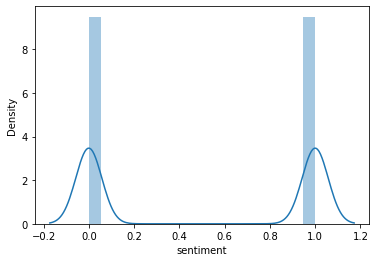

In [134]:
sns.distplot(rev["sentiment"])

In [136]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [137]:
m,g,b = MultinomialNB(),GaussianNB(), BernoulliNB()

In [138]:
m.fit(x_train, y_train)

MultinomialNB()

In [139]:
predict = m.predict(x_test)

In [140]:
actual = y_test

In [142]:
from sklearn.metrics import accuracy_score

In [145]:
accuracy_score(predict, actual)*100

81.26

In [1]:
print("average No of counts" , counts)

NameError: name 'counts' is not defined